<a href="https://colab.research.google.com/github/yooyeollee/Python1/blob/main/%EC%8B%AC%EC%9E%A5%EB%B3%91_%EB%B0%9C%EB%B3%91_%EC%98%88%EC%B8%A1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Dense


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                80        
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_13 (Dense)            (None, 30)                330       
                                                                 
 dropout_7 (Dropout)         (None, 30)                0         
                                                                 
 dense_14 (Dense)            (None, 40)                1240      
                                                                 
 dense_15 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,691
Trainable params: 1,691
Non-traina

<function matplotlib.pyplot.show(*args, **kw)>

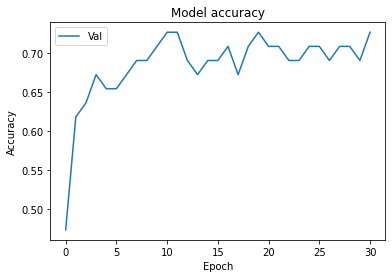

In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

RANDOM_SEED = 3
np.random.seed(RANDOM_SEED) #random seed = 3
scaler = StandardScaler()

url = 'https://raw.githubusercontent.com/202201617/data/main/heart%20disease%20classsfication%20dataset.csv'

df = pd.read_csv(url)
df.isnull().sum().sort_values(ascending=False).head(20) #결측치 없는 거 확인
df = pd.get_dummies(df) #one-hot encoding
df = df.fillna(df.mean()) #결측치 평균으로 채움

df_corr = df.corr()
df_corr_sort = df_corr.sort_values('target_yes', ascending=False)

df_corr_sort['target_yes'].head(10)

cols_train = ['cp', 'thalach', 'slope', 'sex_female', 'sex_male', 'restecg', 'fbs']
x_train_pre = df[cols_train]
standardized_data = scaler.fit_transform(x_train_pre)

y = df['target_yes'].values

#train dataset, test dataset
x_train, x_test, y_train, y_test = train_test_split(standardized_data, y, test_size = 0.1) 
#random_state = random seed 고정

model = Sequential()
model.add(Dense(10, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1))
model.summary()

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

early_stopping_callback = EarlyStopping(monitor = 'val_accuracy', patience = 20)

modelpath = './data/model/any'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_accuracy', verbose = 0, save_best_only = True)

#validation dataset accuracy 구하기
history = model.fit(x_train, y_train, validation_split = 0.2, epochs= 200, batch_size = 30, callbacks = [early_stopping_callback, checkpointer])

score = model.evaluate(x_train, y_train)
print('val accuracy: ', score[1])

plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Val', 'Train'], loc = 'upper left')
plt.show

#https://hyjykelly.tistory.com/49 : validation dataset 만들기
#https://kubig-2021-2.tistory.com/48 : drop-out 적용하기
#https://github.com/gilbutITbook/080324/blob/master/ch15.ipynb :교재 내용
#https://eclass.hufs.ac.kr/ilos/st/course/report_view_form.acl?RT_SEQ=9259068 : 과제

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                80        
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_17 (Dense)            (None, 30)                330       
                                                                 
 dropout_9 (Dropout)         (None, 30)                0         
                                                                 
 dense_18 (Dense)            (None, 40)                1240      
                                                                 
 dense_19 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,691
Trainable params: 1,691
Non-traina

<function matplotlib.pyplot.show(*args, **kw)>

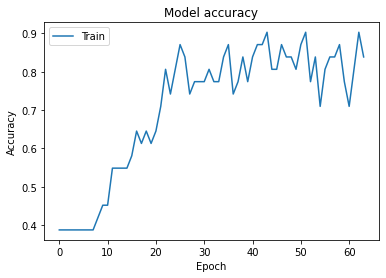

In [ ]:
#숙제 1번 - 6. test dataset으로 accuracy 구하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

RANDOM_SEED = 3
np.random.seed(RANDOM_SEED) #random seed = 3
scaler = StandardScaler()

url = 'https://raw.githubusercontent.com/202201617/data/main/heart%20disease%20classsfication%20dataset.csv'

df = pd.read_csv(url)
df.isnull().sum().sort_values(ascending=False).head(20) #결측치 없는 거 확인
df = pd.get_dummies(df) #one-hot encoding
df = df.fillna(df.mean()) #결측치 평균으로 채움

df_corr = df.corr()
df_corr_sort = df_corr.sort_values('target_yes', ascending=False)

df_corr_sort['target_yes'].head(10)

cols_train = ['cp', 'thalach', 'slope', 'sex_female', 'sex_male', 'restecg', 'fbs']
x_train_pre = df[cols_train]
standardized_data = scaler.fit_transform(x_train_pre)

y = df['target_yes'].values

#train dataset, test dataset
x_train, x_test, y_train, y_test = train_test_split(standardized_data, y, test_size = 0.1, random_state = 3) 

model = Sequential()
model.add(Dense(10, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1))
model.summary()

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

early_stopping_callback = EarlyStopping(monitor = 'accuracy', patience = 20)

modelpath = './data/model/any'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'accuracy', verbose = 0, save_best_only = True)

#validation dataset accuracy 구하기
history = model.fit(x_test, y_test, epochs= 200, batch_size = 30, callbacks = [early_stopping_callback, checkpointer])

score = model.evaluate(x_test, y_test)
print('accuracy: ', score[1])

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show

In [ ]:
#숙제 2번: 결측치 평균으로 메꾸기, 표준화, 원핫인코딩, k겹 교차 검증
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

RANDOM_SEED = 3
np.random.seed(RANDOM_SEED) #random seed = 3
scaler = StandardScaler()

url = 'https://raw.githubusercontent.com/202201617/data/main/heart%20disease%20classsfication%20dataset.csv'

df = pd.read_csv(url)
df.isnull().sum().sort_values(ascending=False).head(20) #결측치 없는 거 확인
df = pd.get_dummies(df) #one-hot encoding
df = df.fillna(df.mean()) #결측치 평균으로 채움

df

x = df.iloc[:,0:16]
y = df.iloc[:,16]

k = 6

kfold = KFold(n_splits = k, shuffle = True)
results = []

def model_fn():
  model = Sequential()
  model.add(Dense(24, input_dim = 60, activation = 'relu', name = 'Dense_1'))
  model.add(Dense(10, activation = 'relu', name = 'Dense_2'))
  model.add(Dense(1, activation = 'sigmoid', name = 'Dense_3'))
  return model

for train_index, test_index in kfold.split(x):
  x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = model_fn()
  model.compile(loss = 'bianry_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  history = model.fit(x_train, y_train, epochs = 300, batch_size = 10, verbose = 0)

  accuracy = model.evaluate(x_test, y_test)[1]
  results.append(accuracy)

avg_acc_score = sum(acc_score) / k

print('정확도: ', results)
pritn('정확도 평균', avg_acc_score)


ValueError: ignored